In [47]:
E = EllipticCurve("11.a1")
print(E)
N = E.conductor()
print("Conductor", N)

Elliptic Curve defined by y^2 + y = x^3 - x^2 - 7820*x - 263580 over Rational Field
Conductor 11


In [48]:
anlist = E.anlist(2001)[1:]

In [49]:
me = lambda z, terms = 2000: sum(an * z^(n)/factorial(n) for n, an in enumerate(anlist[:terms]))

In [50]:
med = lambda z: sum(an * z^(n)/factorial(n) for n, an in enumerate(anlist[1:]))

In [51]:
me(RR(-1))

2.18884513055536

In [52]:
me(RR(1))

-1.11116599130213

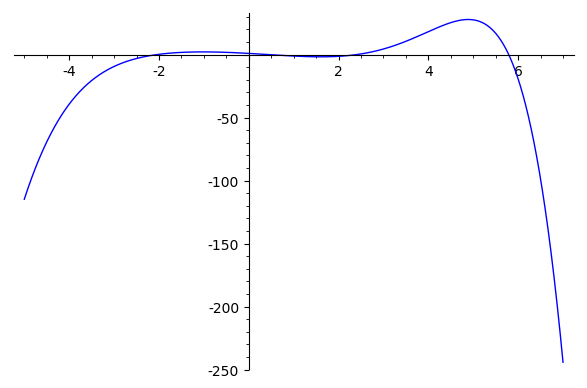

In [55]:
plot(lambda z: me(RR(z)), -5, 7)

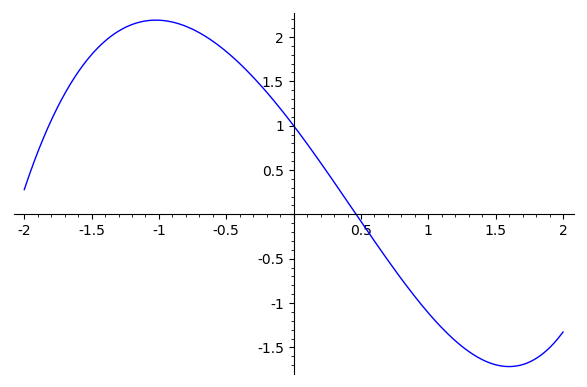

In [54]:
plot(lambda z: me(RR(z)), -2, 2)

In [56]:
#plot(lambda z: me(RR(0.5 * z))*e^(-z), 0, 15)

In [109]:
#plot(lambda phi: abs(me(CC(exp(phi*I)))), 0, 2*pi)

In [106]:
#plot(lambda phi: arg(me(CC(exp(phi*I)))), 0, 2*pi)

In [107]:
#plot(lambda phi: abs(me(CC(0.421781059356420 * exp(phi*I)))), 0, 2*pi)

In [108]:
#plot(lambda phi: abs(me(CC(1.44097057027295 * exp(phi*I)))), 0, 2*pi)

In [57]:
def zero_finetune(z, prec = 10^(-16), prev = set()):
    z1 = z - me(z)/med(z)
    mez1 = me(z1)
    if abs(mez1) < prec or z1 == z or z1 in prev:
        return z1
    else:
        print(abs(mez1))
        prev.add(z1)
        return zero_finetune(z1, prec = prec, prev = prev)

In [58]:
z1 = zero_finetune(0.5); z1

0.0000839731368924235
4.60627453678789e-11


0.463961001114013

In [61]:
z0 = zero_finetune(-2.0); z0

0.0135780813486326
0.0000276469564018579
1.15355064532496e-10
1.46335494340380e-15
1.13748554618692e-15


-2.05844165093504

In [62]:
z2 = zero_finetune(RR(2)); z2

1.44480983341418
0.186742260307352
0.00528411079569054
4.69634746749756e-6
3.72122653619377e-12
5.75761086830143e-16


2.39197334190332

In [66]:
z3 = zero_finetune(RR(5.8)); z3

5.79152304102473

In [82]:
z4 = zero_finetune(CC(3*I+ 5)); z4

90.9305131297531
32.9526175377913
10.9937611971941
3.21790729950627
0.853862252012574
0.151767477359551
0.00416958433073326
2.93292387315051e-6
1.45013476979453e-12
5.44931900234003e-16
5.44931900234003e-16


2.39197334190332

In [70]:
z11 = [z0, z1, z2, z3]

In [67]:
z0*log(-z0)

-1.48609033689231

In [68]:
z1 * log(z1)

-0.356301068358830

In [69]:
z0/z1

-4.43666956057198

In [71]:
log(z1)

-0.767954779611473

In [72]:
log(z1)

-0.767954779611473

In [73]:
z0 / z1

-4.43666956057198

In [74]:
z2 / z1

5.15554828134256

In [75]:
z2 * log(z2)

2.08608466065381

In [76]:
((x - z0) * (x - z1) * (x - z2) * (x - z3)).expand()

x^4 - 6.58901573310703*x^3 - 0.150294556411733*x^2 + 29.9041484312635*x - 13.2302838368102